# Creating Animated Maps

Author: Matt Oakley

## About

A very fundamental aspect of modern science is the ability to visualize things such as data. Sure, the data that we acquire can prove very useful to us and can be easy to understand; however, to an outsider this data could be complete jibberish. Therefore, it's necessary to utilize the data that we currently have and create scientific visualizations from this data in order to help others better understand the data we've acquired or the ideas that we're trying to convey.

This tutorial will go over how to create animated maps using software such as Basemap and Matplotlib in order visualize data. Specifically, we'll be animating  dots appearing on each capital city in the United States.

## Objectives

- Get familiar with Basemap
- Set up the data we want to visualize and create the final animation

## Dependencies

- Basemap
- Matplotlib
- Numpy

In [1]:
!pip install basemap
!pip install matplotlib
!pip install numpy

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

%matplotlib inline

## Getting Familiar with Basemap

We'll first need to familiarize ourselves with Basemap. Basemap is a really great Python package which allows us to draw and render out images of the Earth. Therefore, once we get this set up, we'll be able to plot things on top of the map that we've created.

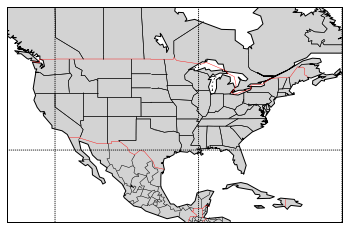

In [3]:
#Center the map over the United States via the proper lat/lon values
my_map = Basemap(llcrnrlon = -130, llcrnrlat = 15, urcrnrlon = -60, urcrnrlat = 60)

#Draw coastlines, state boundaries, meridians, parallels, etc.
my_map.drawcoastlines()
my_map.drawcountries(linewidth = 0.4, linestyle = 'solid', color = 'red', antialiased = 1, ax = None, zorder = None)
my_map.fillcontinents(color = 'lightgrey')
my_map.drawstates()
my_map.drawmapboundary()
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))

x,y = my_map(0, 0)
point = my_map.plot(x, y, 'ro', markersize = 5)[0]

my_map

## Create Data and the Final Animation

Now that we have our base map set up,  we now have to create the data that we want to plot as well as the final animation. This is accomplished with matplotlib's animation functionality.


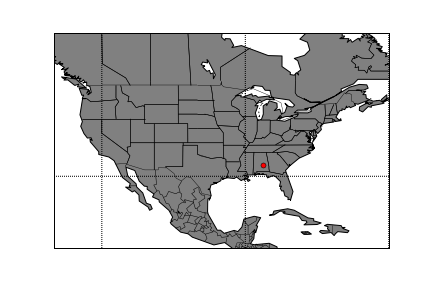
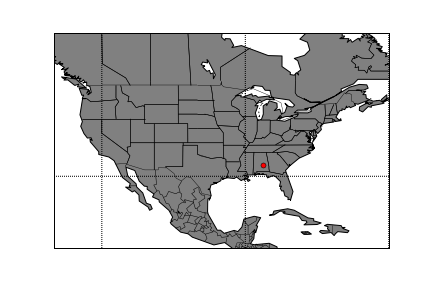
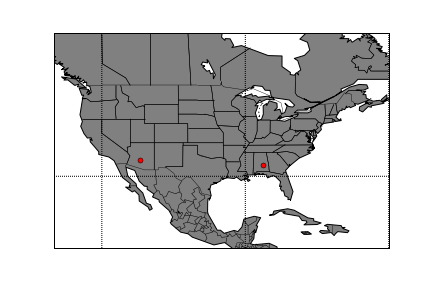
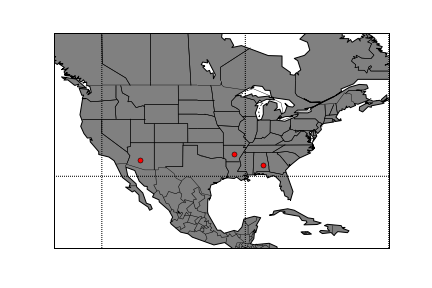
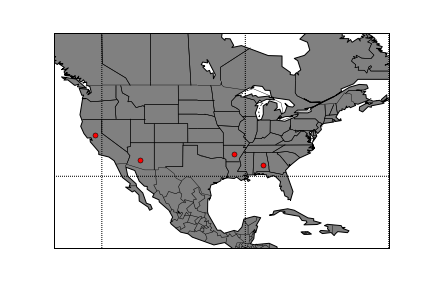
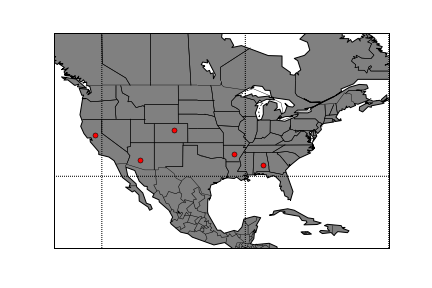
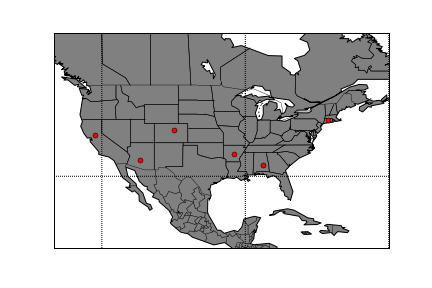
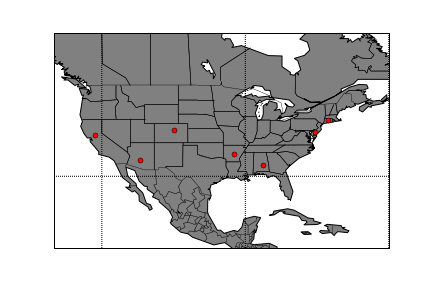
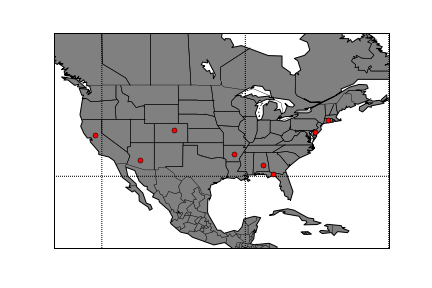
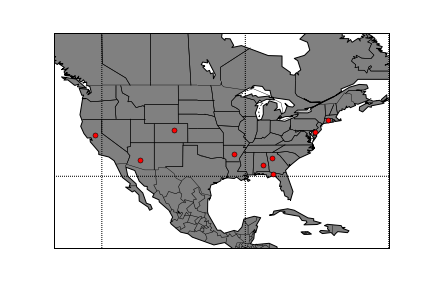
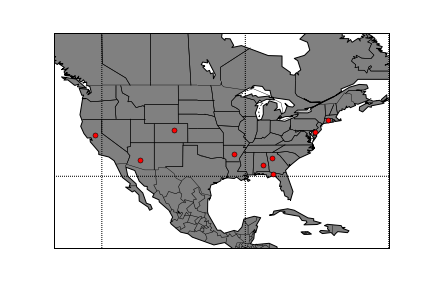
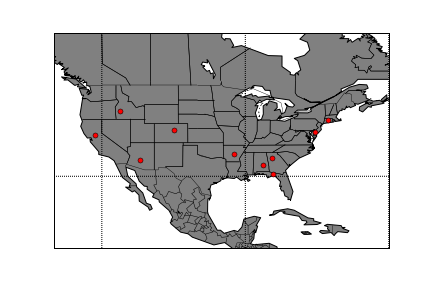
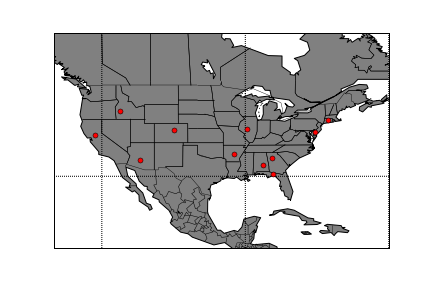
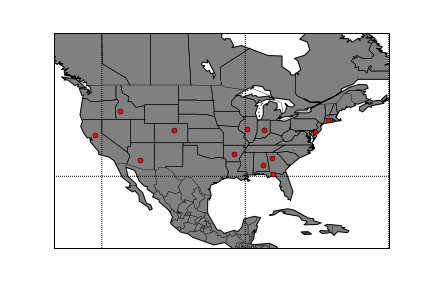
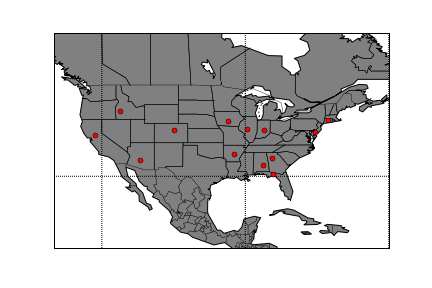
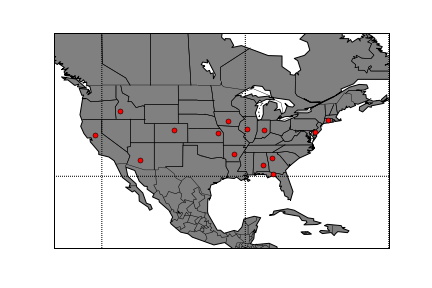
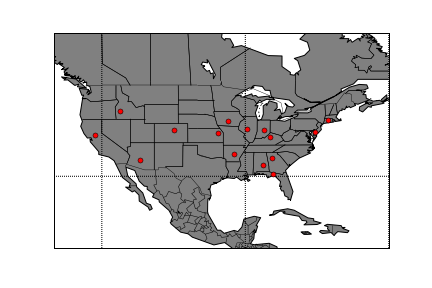
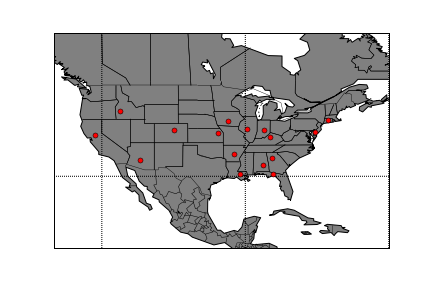
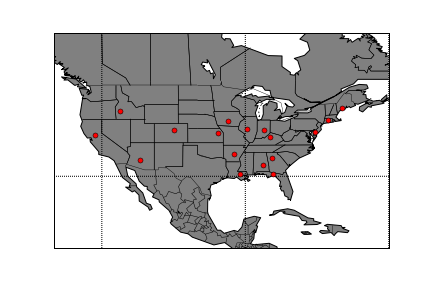
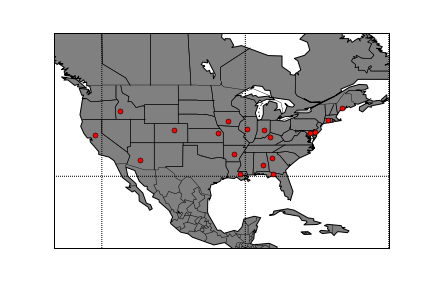
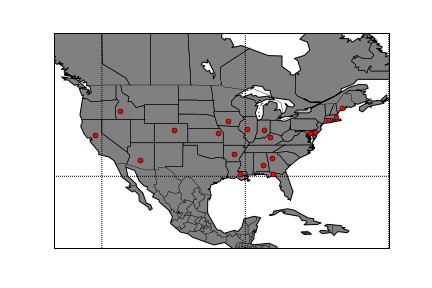
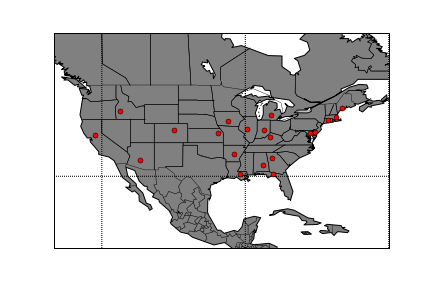
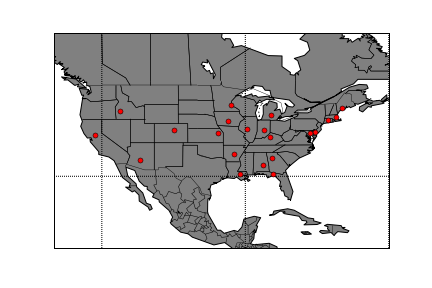
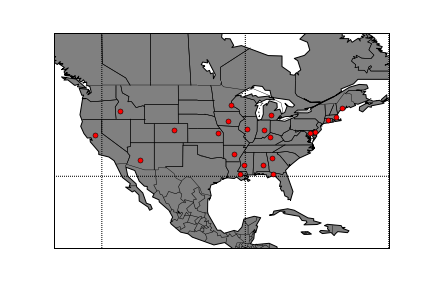
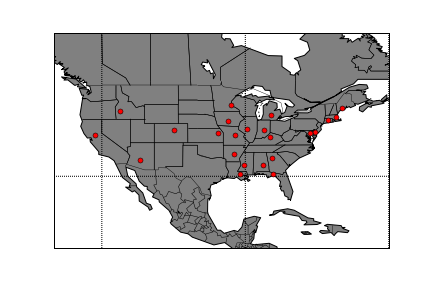
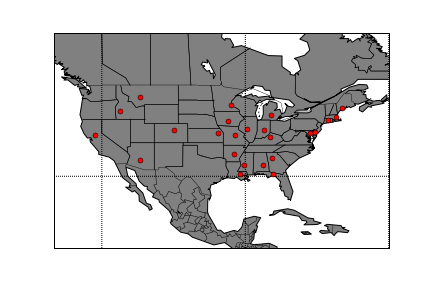
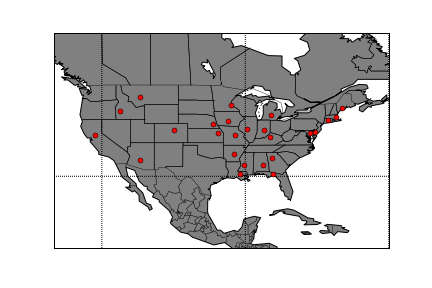
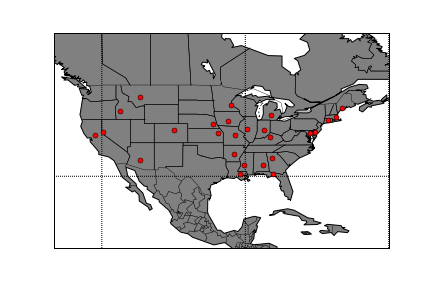
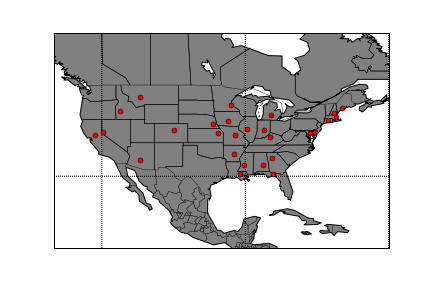
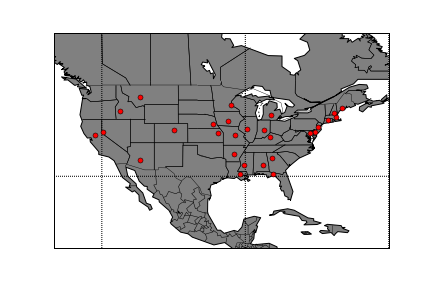
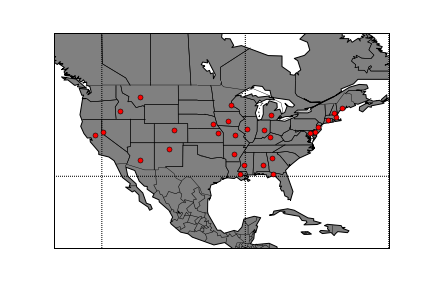
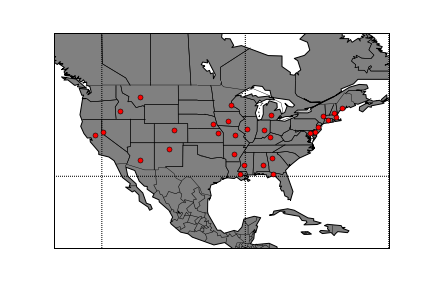
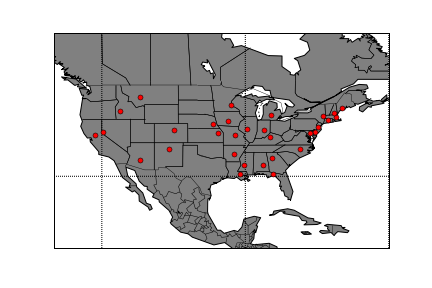
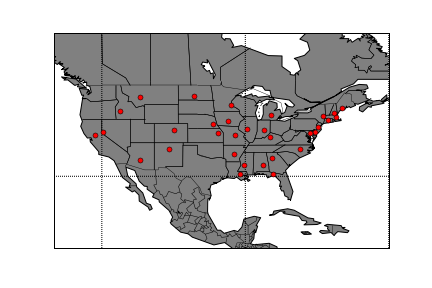
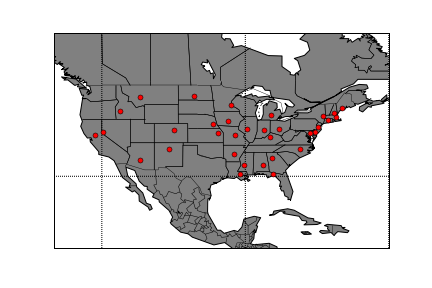
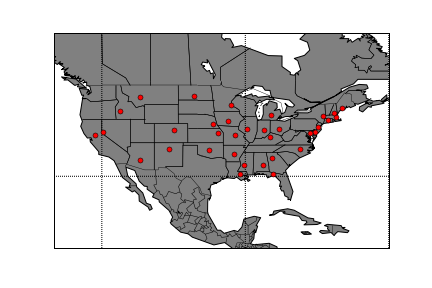
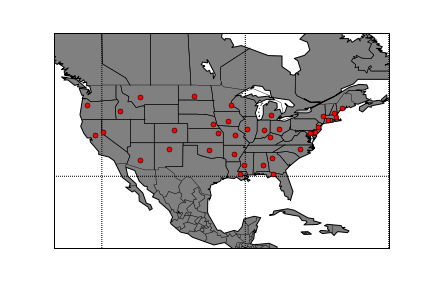
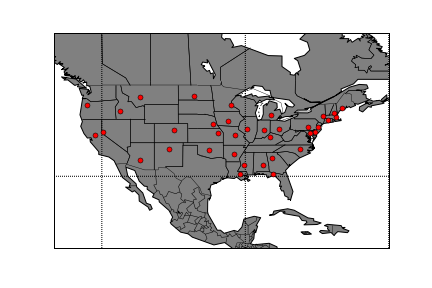
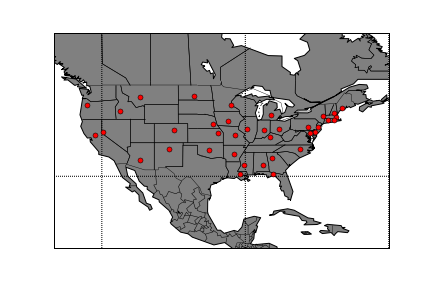
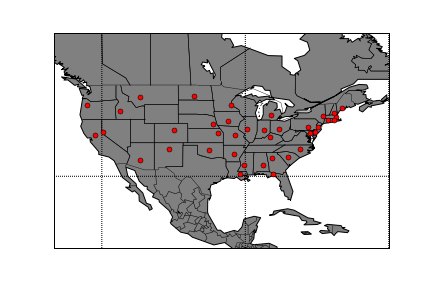
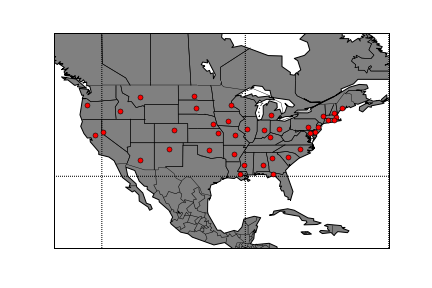
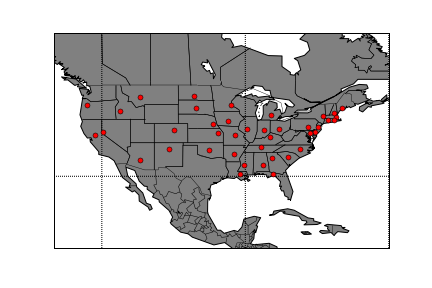
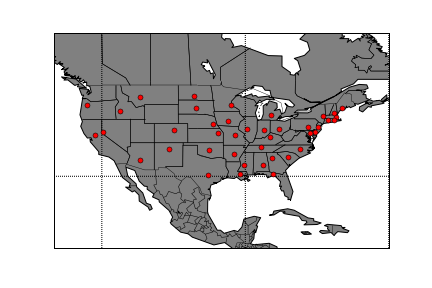
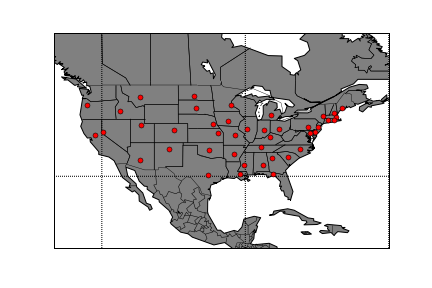
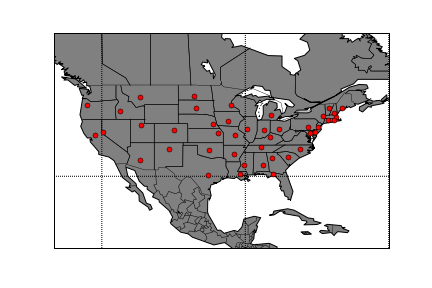
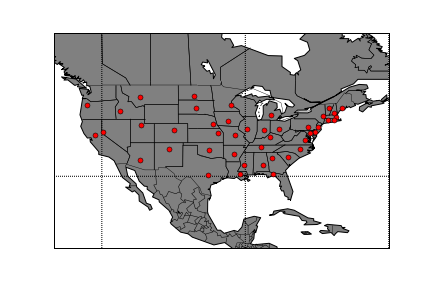
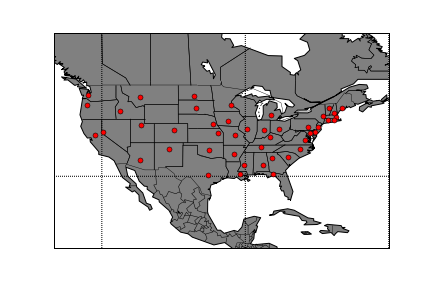
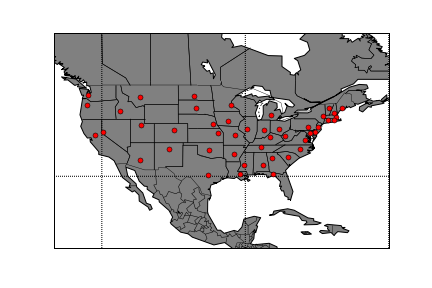
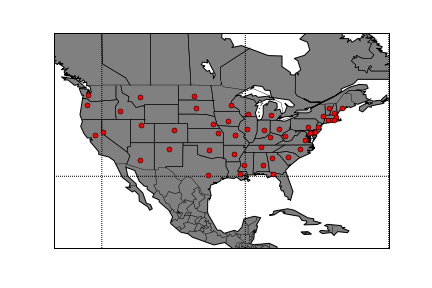
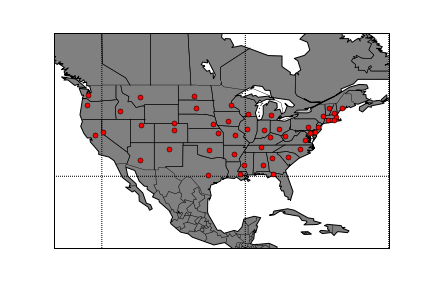

In [4]:
#Global Variables
lons = []
lats = []
iterr = 0

#Re-setup our map
my_map = Basemap(llcrnrlon = -130, llcrnrlat = 15, urcrnrlon = -60, urcrnrlat = 60)
          
my_map.drawcoastlines()
my_map.drawcountries(linewidth = 0.4, linestyle = 'solid', color = 'black', antialiased = 1, ax = None, zorder = None)
my_map.fillcontinents(color = 'gray')
my_map.drawstates()
my_map.drawmapboundary()
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))

x,y = my_map(0, 0)
point = my_map.plot(x, y, 'ro', markersize=5)[0]

#Create a list of all the US capital coordinates
states = [(32.3668, -86.3), (58.3019, -134.4197), (33.4484, -112.0740), (34.7465, -92.2896),
            (38.5816, -121.4944), (39.7392, -104.9903), (41.7637, -72.6851), (39.1582, -75.5244),
            (30.4383, -84.2807), (33.7490, -84.388), (21.3069, -157.8583), (43.6187, -116.2146),
            (39.7817, -89.6501), (39.7684, -86.1581), (41.6005, -93.6091), (39.0558, -95.689),
            (38.2009, -84.8733), (30.4583, -91.1403), (44.3106, -69.7795), (38.9784, -76.4922),
            (42.3601, -71.0589), (42.7325, -84.5555), (44.9537, -93.09), (32.2988, -90.1848),
            (38.5767, -92.1735), (46.5884, -112.0245), (40.8258, -96.6852), (39.1638, -119.7674),
            (43.2081, -71.5376), (40.2171, -74.7429), (35.6870, -105.9378), (42.6526, -73.7562),
            (35.7796, -78.6382), (46.8083, -100.7837), (39.9612, -82.9988), (35.4676, -97.5164),
            (44.9429, -123.0351), (40.2732, -76.8867), (41.824, -71.4128), (34.0007, -81.0348),
            (44.3683, -100.351), (36.1627, -86.7816), (30.2672, -97.7431), (40.7608, -111.891),
            (44.2601, -72.5754), (37.5407, -77.436), (47.0379, -122.9007), (38.3498, -81.6326),
            (43.0731, -89.4012), (41.14, -104.8202), (0, 0)]

#Create the initialization and animation functions
def init():
    point.set_data([], [])
    return point,

def animate(i):
    global lons
    global lats
    global iterr

    lats.append(states[iterr][0])
    lons.append(states[iterr][1])
    iterr += 1

    x, y = my_map(lons, lats)
    point.set_data(x, y)
    return point,

#Create the final animation
anim = animation.FuncAnimation(plt.gcf(), animate, init_func=init,
                               frames=50, interval=500, blit=True)

display_animation(anim)